In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("model.csv")


In [3]:
print("Data Head\n",data.head())

Data Head
                                               Review    Label
0  may sound noisi initi find good place bar nois...  Postive
1  good burger atmospher uniqu expect hard rock m...  Postive
2  pre arrang breakfast peopl open us normal open...  Postive
3  nice decor share platter crumb chicken spring ...  Postive
4  great hard rock never bad countri favourit far...  Postive


In [4]:
print("Data Describe\n", data.describe())

Data Describe
                                                    Review    Label
count                                                3062     3062
unique                                               1543        3
top     visit son whilst break birthday price reason c...  Postive
freq                                                    3     2742


In [5]:
print("Data Shape\n",data.shape)

Data Shape
 (3062, 2)


In [6]:
print("Data Label Count\n\n", data["Label"].value_counts())

Data Label Count

 Postive     2742
Negative     173
Neutral      147
Name: Label, dtype: int64


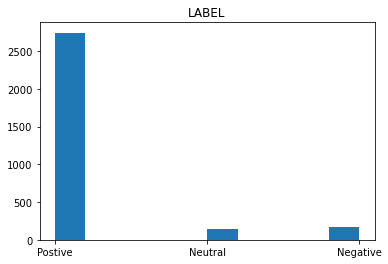

In [7]:
plt.hist(data.Label)
plt.title("LABEL")
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
count_vect = CountVectorizer(max_features = 3000)
x = count_vect.fit_transform(data['Review']).toarray()

In [10]:
x.shape

(3062, 2424)

In [11]:
pip install --user -U imblearn

Requirement already up-to-date: imblearn in c:\users\hp\appdata\roaming\python\python37\site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\python\python37\python.exe -m pip install --upgrade pip' command.


In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
over_sample = SMOTE(random_state = 100, sampling_strategy = "all")

In [14]:
data_oversample,y_label = over_sample.fit_sample(x,data['Label'])

In [15]:
y_label.value_counts()

Negative    2742
Neutral     2742
Postive     2742
Name: Label, dtype: int64

In [16]:
data_oversample.shape

(8226, 2424)

###### There is a data imbalance 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data_oversample,y_label, test_size = 0.3, random_state = 42)


In [19]:
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(5758, 2424) (5758,)
(2468, 2424) (2468,)


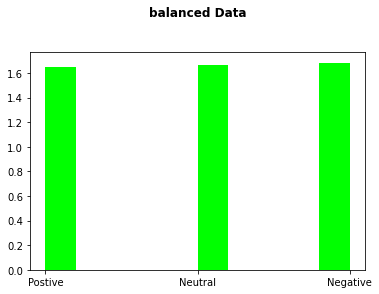

In [20]:
colors = ['lime'] 
  
plt.hist(y_train, 
         density = True,  
         histtype ='barstacked', 
         color = colors)  
  
plt.title('balanced Data\n\n', 
          fontweight ="bold") 
  
plt.show() 

# Ensemble 


#### Random_Forest_bagging

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,classification_report, confusion_matrix

In [22]:
RF = RandomForestClassifier(n_estimators = 120,
                           random_state = 50,
                           n_jobs = -1,
                           max_features = 'auto')
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=50)

In [23]:
rf_pred = RF.predict(x_test)

In [24]:
print("Accuracy of Random forest classifier:\n\n", accuracy_score(y_test,rf_pred))

Accuracy of Random forest classifier:

 0.9809562398703403


In [25]:
print("Classification Report:\n\n", classification_report(y_test,rf_pred))

Classification Report:

               precision    recall  f1-score   support

    Negative       0.98      0.97      0.97       804
     Neutral       0.96      0.99      0.98       821
     Postive       1.00      0.99      0.99       843

    accuracy                           0.98      2468
   macro avg       0.98      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468



In [26]:
print("Confusion Matrix \n\n", confusion_matrix(y_test,rf_pred))

Confusion Matrix 

 [[776  28   0]
 [  7 814   0]
 [  6   6 831]]


# MultiNomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
mn = MultinomialNB()
mn.fit(x_train, y_train)

MultinomialNB()

In [29]:
mn_pred = mn.predict(x_test)

In [30]:
print("Accuracy of Multinomial Naive Bayes\n\n\n", accuracy_score(y_test,mn_pred))

Accuracy of Multinomial Naive Bayes


 0.8379254457050244


In [31]:
print("Classification Report \n\n\n", classification_report(y_test,mn_pred))

Classification Report 


               precision    recall  f1-score   support

    Negative       0.74      0.85      0.79       804
     Neutral       0.85      0.71      0.78       821
     Postive       0.93      0.95      0.94       843

    accuracy                           0.84      2468
   macro avg       0.84      0.84      0.84      2468
weighted avg       0.84      0.84      0.84      2468



In [32]:
print("confusion matrix:\n\n\n", confusion_matrix(y_test,mn_pred))

confusion matrix:


 [[682  81  41]
 [218 585  18]
 [ 20  22 801]]


# Stochastic Gradient Descent 


##### Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

In [37]:
from sklearn.linear_model import SGDClassifier

In [38]:
sgd = SGDClassifier(alpha = 0.00047, random_state = 50)

In [39]:
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)

In [40]:

print("Accuracy of SGD:\n\n", accuracy_score(y_test,sgd_pred))

Accuracy of SGD:

 0.9448946515397083


In [41]:
print("classification report of SGD\n\n", classification_report(y_test,sgd_pred))

classification report of SGD

               precision    recall  f1-score   support

    Negative       0.96      0.89      0.93       804
     Neutral       0.89      0.97      0.93       821
     Postive       0.99      0.97      0.98       843

    accuracy                           0.94      2468
   macro avg       0.95      0.94      0.94      2468
weighted avg       0.95      0.94      0.95      2468



In [42]:
print("Confusion matrix sgd:\n\n", confusion_matrix(y_test,sgd_pred))

Confusion matrix sgd:

 [[716  84   4]
 [ 18 799   4]
 [ 10  16 817]]


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
LR = LogisticRegression(solver = 'liblinear',
                       multi_class = 'ovr',
                       max_iter = 1000,
                       random_state = 42,
                       penalty ="l2")
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [45]:
LR_pred = LR.predict(x_test)

In [46]:
print("Accuracy of Logistic Regression\n\n", accuracy_score(y_test,LR_pred))

Accuracy of Logistic Regression

 0.9529983792544571


In [47]:
print("Classification of Logistic Regression\n\n",classification_report(y_test,LR_pred))

Classification of Logistic Regression

               precision    recall  f1-score   support

    Negative       0.97      0.91      0.94       804
     Neutral       0.90      0.98      0.94       821
     Postive       1.00      0.97      0.98       843

    accuracy                           0.95      2468
   macro avg       0.95      0.95      0.95      2468
weighted avg       0.96      0.95      0.95      2468



In [48]:
print("Confusion matrix of Logistic Regression\n\n\n",confusion_matrix(y_test,LR_pred))

Confusion matrix of Logistic Regression


 [[734  70   0]
 [ 16 801   4]
 [  8  18 817]]


# XGBoost

In [50]:
pip install --user -U xgboost


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\python\python37\python.exe -m pip install --upgrade pip' command.


In [51]:


import xgboost as xg

In [52]:
xgb = xg.XGBClassifier(learning_rate = 0.01,
                       colsample_bytree = 0.8,
                       subsample = 0.8,
                       objective = 'multi:softmax', 
                       n_estimators = 100, 
                       reg_alpha = 0.3,
                       max_depth = 4, 
                       gamma = 1,
                       num_class = 3)

In [53]:
xgb.fit(x_train , y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
xgb_pred = xgb.predict(x_test)

In [57]:
print("Accuracy of XGB =", accuracy_score(y_test,xgb_pred),"\n")
print("Classification of XGB\n\n",classification_report(y_test,xgb_pred),"\n")
print("Confusion matrix of XGB\n\n\n",confusion_matrix(y_test,xgb_pred))

Accuracy of XGB = 0.784035656401945 

Classification of XGB

               precision    recall  f1-score   support

    Negative       0.89      0.58      0.70       804
     Neutral       0.65      0.93      0.76       821
     Postive       0.92      0.83      0.88       843

    accuracy                           0.78      2468
   macro avg       0.82      0.78      0.78      2468
weighted avg       0.82      0.78      0.78      2468
 

Confusion matrix of XGB


 [[469 321  14]
 [ 14 763  44]
 [ 45  95 703]]


In [58]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import  AdaBoostClassifier

In [59]:
ada_model = OneVsRestClassifier(AdaBoostClassifier())

In [60]:
ada_model.fit(x_train,y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier())

In [61]:
ada_pred = ada_model.predict(x_test)

In [64]:
print("Accuracy of ada =", accuracy_score(y_test,ada_pred),"\n")
print("Classification of ada\n\n",classification_report(y_test,ada_pred),"\n")
print("Confusion matrix of ada\n\n\n",confusion_matrix(y_test,ada_pred))

Accuracy of ada = 0.8642625607779578 

Classification of ada

               precision    recall  f1-score   support

    Negative       0.92      0.74      0.82       804
     Neutral       0.77      0.93      0.84       821
     Postive       0.94      0.92      0.93       843

    accuracy                           0.86      2468
   macro avg       0.87      0.86      0.86      2468
weighted avg       0.87      0.86      0.86      2468
 

Confusion matrix of ada


 [[592 189  23]
 [ 27 764  30]
 [ 25  41 777]]


In [64]:
ovr_model = OneVsRestClassifier(xg.XGBClassifier())
ovr_model.fit(x_train,y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                      

In [65]:
ovr_model_pred = ovr_model.predict(x_test)

In [66]:
print("Accuracy of OneVsRestClassifier using xgb=", accuracy_score(y_test,ovr_model_pred),"\n")
print("Classification of  OneVsRestClassifier using xgb\n\n",classification_report(y_test,ovr_model_pred),"\n")
print("Confusion matrix of  OneVsRestClassifier using xgb\n\n\n",confusion_matrix(y_test,ovr_model_pred))

Accuracy of OneVsRestClassifier using xgb= 0.9675850891410048 

Classification of  OneVsRestClassifier using xgb

               precision    recall  f1-score   support

    Negative       0.98      0.93      0.96       804
     Neutral       0.93      0.99      0.96       821
     Postive       1.00      0.98      0.99       843

    accuracy                           0.97      2468
   macro avg       0.97      0.97      0.97      2468
weighted avg       0.97      0.97      0.97      2468
 

Confusion matrix of  OneVsRestClassifier using xgb


 [[751  53   0]
 [  7 814   0]
 [  9  11 823]]


# suport vector classifier

In [67]:
from sklearn import svm

In [68]:
svm = svm.LinearSVC(multi_class = 'ovr')
svm.fit(x_train,y_train)

LinearSVC()

In [69]:
svm_pred = svm.predict(x_test)

In [70]:
print("Accuracy of svm=", accuracy_score(y_test,svm_pred),"\n")
print("Classification of  svm\n\n",classification_report(y_test,svm_pred),"\n")
print("Confusion matrix of svm\n\n\n",confusion_matrix(y_test,svm_pred))

Accuracy of svm= 0.9647487844408428 

Classification of  svm

               precision    recall  f1-score   support

    Negative       0.95      0.96      0.96       804
     Neutral       0.94      0.97      0.95       821
     Postive       1.00      0.97      0.98       843

    accuracy                           0.96      2468
   macro avg       0.97      0.96      0.96      2468
weighted avg       0.97      0.96      0.96      2468
 

Confusion matrix of svm


 [[772  32   0]
 [ 27 794   0]
 [ 10  18 815]]


# KNN classification

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
knn_pred = knn.predict(x_test)

In [76]:
print("Accuracy of knn=", accuracy_score(y_test,knn_pred),"\n")
print("Classification of  knn\n\n",classification_report(y_test,knn_pred),"\n")
print("Confusion matrix of knn\n\n\n",confusion_matrix(y_test,knn_pred))

Accuracy of knn= 0.68354943273906 

Classification of  knn

               precision    recall  f1-score   support

    Negative       0.66      0.96      0.78       804
     Neutral       0.68      0.99      0.81       821
     Postive       1.00      0.12      0.21       843

    accuracy                           0.68      2468
   macro avg       0.78      0.69      0.60      2468
weighted avg       0.78      0.68      0.60      2468
 

Confusion matrix of knn


 [[773  31   0]
 [  7 814   0]
 [389 354 100]]


In [77]:
from sklearn.linear_model import Perceptron

In [78]:
per = Perceptron(penalty = 'l1',
                alpha = 0.0005)
per.fit(x_train,y_train)

Perceptron(alpha=0.0005, penalty='l1')

In [79]:
per_pred = per.predict(x_test)

In [80]:
print("Accuracy of  Perceptron=", accuracy_score(y_test,per_pred),"\n")
print("Classification of   Perceptron\n\n",classification_report(y_test,per_pred),"\n")
print("Confusion matrix of  Perceptron\n\n\n",confusion_matrix(y_test,per_pred))

Accuracy of  Perceptron= 0.8877633711507293 

Classification of   Perceptron

               precision    recall  f1-score   support

    Negative       0.91      0.82      0.87       804
     Neutral       0.83      0.92      0.87       821
     Postive       0.93      0.91      0.92       843

    accuracy                           0.89      2468
   macro avg       0.89      0.89      0.89      2468
weighted avg       0.89      0.89      0.89      2468
 

Confusion matrix of  Perceptron


 [[663 114  27]
 [ 32 757  32]
 [ 31  41 771]]


In [80]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [81]:
pac = PassiveAggressiveClassifier(class_weight = 'balanced',
                                 C = 0.4)
pac.fit(x_train,y_train)
pac_pred = pac.predict(x_test)

In [82]:
print("Accuracy of  PassiveAggressiveClassifier=", accuracy_score(y_test,pac_pred),"\n")
print("Classification of   PassiveAggressiveClassifier\n\n",classification_report(y_test,pac_pred),"\n")
print("Confusion matrix of  PassiveAggressiveClassifier\n\n\n",confusion_matrix(y_test,pac_pred))

Accuracy of  PassiveAggressiveClassifier= 0.9521880064829822 

Classification of   PassiveAggressiveClassifier

               precision    recall  f1-score   support

    Negative       0.98      0.90      0.94       804
     Neutral       0.89      0.98      0.94       821
     Postive       1.00      0.97      0.98       843

    accuracy                           0.95      2468
   macro avg       0.96      0.95      0.95      2468
weighted avg       0.96      0.95      0.95      2468
 

Confusion matrix of  PassiveAggressiveClassifier


 [[725  77   2]
 [ 11 808   2]
 [  6  20 817]]


In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [84]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)


LinearDiscriminantAnalysis()

In [85]:
lda_pred = lda.predict(x_test)

In [86]:
print("Accuracy of  LinearDiscriminantAnalysi=", accuracy_score(y_test,lda_pred),"\n")
print("Classification of   LinearDiscriminantAnalysi\n\n",classification_report(y_test,lda_pred),"\n")
print("Confusion matrix of  LinearDiscriminantAnalysi\n\n\n",confusion_matrix(y_test,lda_pred))

Accuracy of  LinearDiscriminantAnalysi= 0.9100486223662885 

Classification of   LinearDiscriminantAnalysi

               precision    recall  f1-score   support

    Negative       0.92      0.90      0.91       804
     Neutral       0.83      0.98      0.90       821
     Postive       1.00      0.85      0.92       843

    accuracy                           0.91      2468
   macro avg       0.92      0.91      0.91      2468
weighted avg       0.92      0.91      0.91      2468
 

Confusion matrix of  LinearDiscriminantAnalysi


 [[720  84   0]
 [ 14 807   0]
 [ 48  76 719]]


# RIDGE 

In [87]:
from sklearn.linear_model import RidgeClassifier

In [88]:
rc = RidgeClassifier()
rc.fit(x_train,y_train)


RidgeClassifier()

In [89]:
rc_pred = rc.predict(x_test)


In [90]:
print("Accuracy of  ridge=", accuracy_score(y_test,lda_pred),"\n")
print("Classification of   ridge\n\n",classification_report(y_test,lda_pred),"\n")
print("Confusion matrix of  ridge\n\n\n",confusion_matrix(y_test,lda_pred))

Accuracy of  ridge= 0.9100486223662885 

Classification of   ridge

               precision    recall  f1-score   support

    Negative       0.92      0.90      0.91       804
     Neutral       0.83      0.98      0.90       821
     Postive       1.00      0.85      0.92       843

    accuracy                           0.91      2468
   macro avg       0.92      0.91      0.91      2468
weighted avg       0.92      0.91      0.91      2468
 

Confusion matrix of  ridge


 [[720  84   0]
 [ 14 807   0]
 [ 48  76 719]]


In [91]:
print("Accuracy of Random forest classifier=", accuracy_score(y_test,rf_pred),'\n')
print("Accuracy of Multinomial Naive Bayes=", accuracy_score(y_test,mn_pred),'\n')
print("Accuracy of SGD=", accuracy_score(y_test,sgd_pred),'\n')
print("Accuracy of Logistic Regression=", accuracy_score(y_test,LR_pred),'\n')
print("Accuracy of svm=", accuracy_score(y_test,svm_pred),"\n")
print("Accuracy of ada =", accuracy_score(y_test,ada_pred),"\n")
print("Accuracy of XGB =", accuracy_score(y_test,xgb_pred),"\n")
print("Accuracy of OneVsRestClassifier using xgb=", accuracy_score(y_test,ovr_model_pred),"\n")
print("Accuracy of knn=", accuracy_score(y_test,knn_pred),"\n")
print("Accuracy of Perceptron=", accuracy_score(y_test,per_pred),"\n")
print("Accuracy of PassiveAggressiveClassifier=", accuracy_score(y_test,pac_pred),"\n")
print("Accuracy of LinearDiscriminantAnalysi=", accuracy_score(y_test,lda_pred),"\n")
print("Accuracy of ridge=", accuracy_score(y_test,lda_pred),"\n")

Accuracy of Random forest classifier= 0.9809562398703403 

Accuracy of Multinomial Naive Bayes= 0.8379254457050244 

Accuracy of SGD= 0.9448946515397083 

Accuracy of Logistic Regression= 0.9529983792544571 

Accuracy of svm= 0.9647487844408428 

Accuracy of ada = 0.8654781199351702 

Accuracy of XGB = 0.784035656401945 

Accuracy of OneVsRestClassifier using xgb= 0.9675850891410048 

Accuracy of knn= 0.68354943273906 

Accuracy of Perceptron= 0.8387358184764991 

Accuracy of PassiveAggressiveClassifier= 0.9521880064829822 

Accuracy of LinearDiscriminantAnalysi= 0.9100486223662885 

Accuracy of ridge= 0.9100486223662885 



# finally random forest classifier is the best model to deploy